In [ ]:
from notebookinit import *

2023-03-24 16:43:31.014205: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-24 16:43:31.932952: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-24 16:43:31.933001: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-24 16:43:31.933005: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [ ]:
# this_pwd = os.getcwd()
# target_folder = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data', 'model-A-all'))
target_folder = "/home/mib07150/git/remote-fs/buildserver/storage3/george-yals/data/perf"
print(target_folder)
import glob
db_files = glob.glob(f'{target_folder}/*.sqlite')
# db_files

/home/mib07150/git/remote-fs/buildserver/storage3/george-yals/data/perf


['/home/mib07150/git/remote-fs/buildserver/storage3/george-yals/data/perf/2023-03-24T16:25:14.619124.sqlite',
 '/home/mib07150/git/remote-fs/buildserver/storage3/george-yals/data/perf/2023-03-24T15:55:11.302440.sqlite',
 '/home/mib07150/git/remote-fs/buildserver/storage3/george-yals/data/perf/2023-03-24T16:39:16.158973.sqlite',
 '/home/mib07150/git/remote-fs/buildserver/storage3/george-yals/data/perf/2023-03-24T16:40:16.285047.sqlite',
 '/home/mib07150/git/remote-fs/buildserver/storage3/george-yals/data/perf/2023-03-24T16:30:15.185139.sqlite',
 '/home/mib07150/git/remote-fs/buildserver/storage3/george-yals/data/perf/2023-03-24T15:51:10.877293.sqlite',
 '/home/mib07150/git/remote-fs/buildserver/storage3/george-yals/data/perf/2023-03-24T16:34:15.618114.sqlite',
 '/home/mib07150/git/remote-fs/buildserver/storage3/george-yals/data/perf/2023-03-24T16:38:16.048667.sqlite',
 '/home/mib07150/git/remote-fs/buildserver/storage3/george-yals/data/perf/2023-03-24T16:06:12.522590.sqlite',
 '/home/mi

In [ ]:
import sqlite3
result=[]
for db_file in tqdm(db_files):
    try:
        db_connection = sqlite3.connect(db_file)
        db_cursor = db_connection.cursor()
        db_cursor.execute('''
        select 
            json_extract(payload, "$.data.elapsed_nanoseconds") as elapsed,
            json_extract(payload, "$.time") as t
        --    *
        from data
        where topic = "CH4/performance"
        '''
                         )
        q = db_cursor.fetchall()
        result.extend(q)
    except:
        print(f'fail on {db_file}')

  0%|          | 0/75 [00:00<?, ?it/s]

In [ ]:
len(result)

451151

In [ ]:
df = pandas.DataFrame.from_records(result)
df.columns=['processing_time', 'timestamp']

In [ ]:
df.tail()

,processing_time,timestamp
451146,5769675,2023-03-24T16:32:15.315703Z
451147,5737995,2023-03-24T16:32:15.325637Z
451148,5712165,2023-03-24T16:32:15.335607Z
451149,5711055,2023-03-24T16:32:15.345607Z
451150,5712135,2023-03-24T16:32:15.355596Z


In [ ]:
len(df)

451151

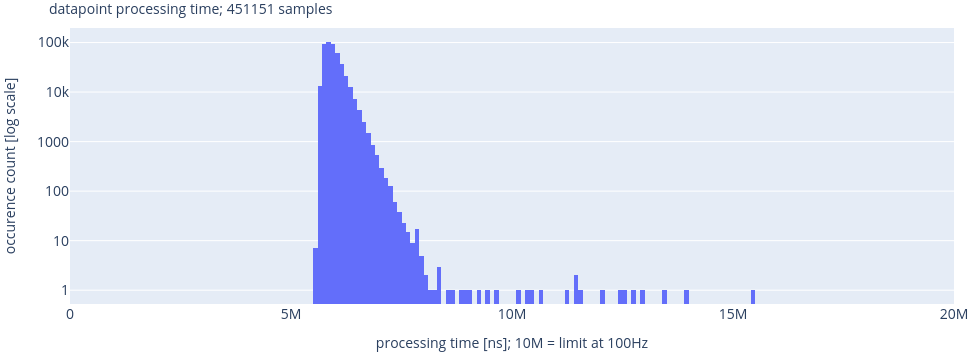

In [ ]:
# histnorm="probability density"
sample_count = len(df)
hf=px.histogram(df,x='processing_time', nbins=100, log_y=True, range_x=[0.0, 20e6])
hf=px_describe(hf,title=f'datapoint processing time; {sample_count} samples', xlabel='processing time [ns]; 10M = limit at 100Hz', ylabel='occurence count [log scale]')
px_show(hf)

In [ ]:
# check most typical mode
print(f'mode,  miliseconds     :  {df.processing_time.mode().mean()/1e6:0.3f} ms')
# check standard deviation
print(f'standard deviation     :  {df.processing_time.std()/1e6:0.3f} ms')
# check the 1% quantile value
print(f'99.9th quantile value  :  {df.processing_time.quantile(0.999)/1e6:0.3f} ms')
# check the absolute worst sample:
print(f'absolute worst sample  : {df.processing_time.max()/1e6:0.3f} ms')

mode,  miliseconds     :  5.822 ms
standard deviation     :  0.213 ms
99.9th quantile value  :  7.128 ms
absolute worst sample  : 15.433 ms
